In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('Customers.xlsx')
data.set_index('CustomerID', inplace=True)

In [3]:
data.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


In [4]:
data.tail()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2
1999,Male,77,182109,4,Executive,7,2
2000,Male,90,110610,52,Entertainment,5,2


In [5]:
data.shape

(2000, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


In [7]:
data.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [8]:
data.corr()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.021378,-0.041798,-0.014319,0.038254
Annual Income ($),0.021378,1.000000,0.023299,0.089136,0.093005
Spending Score (1-100),-0.041798,0.023299,1.000000,-0.028948,0.002232
Work Experience,-0.014319,0.089136,-0.028948,1.000000,0.011873
Family Size,0.038254,0.093005,0.002232,0.011873,1.000000


In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [11]:
df = data[data.isnull().any(axis=1)]
data.drop(df.index, inplace=True)

In [12]:
data.isna().sum()

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [13]:
data.head(1)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4


## EDA
### Categorical columns
* Gender
* Profession
* family Size

### Numerical Columns
* Age
* Annual Income ($)
* Spending Score (1-100)
* Work Experience

### Uni-variate analysis

### Gender

Female    1166
Male       799
Name: Gender, dtype: int64

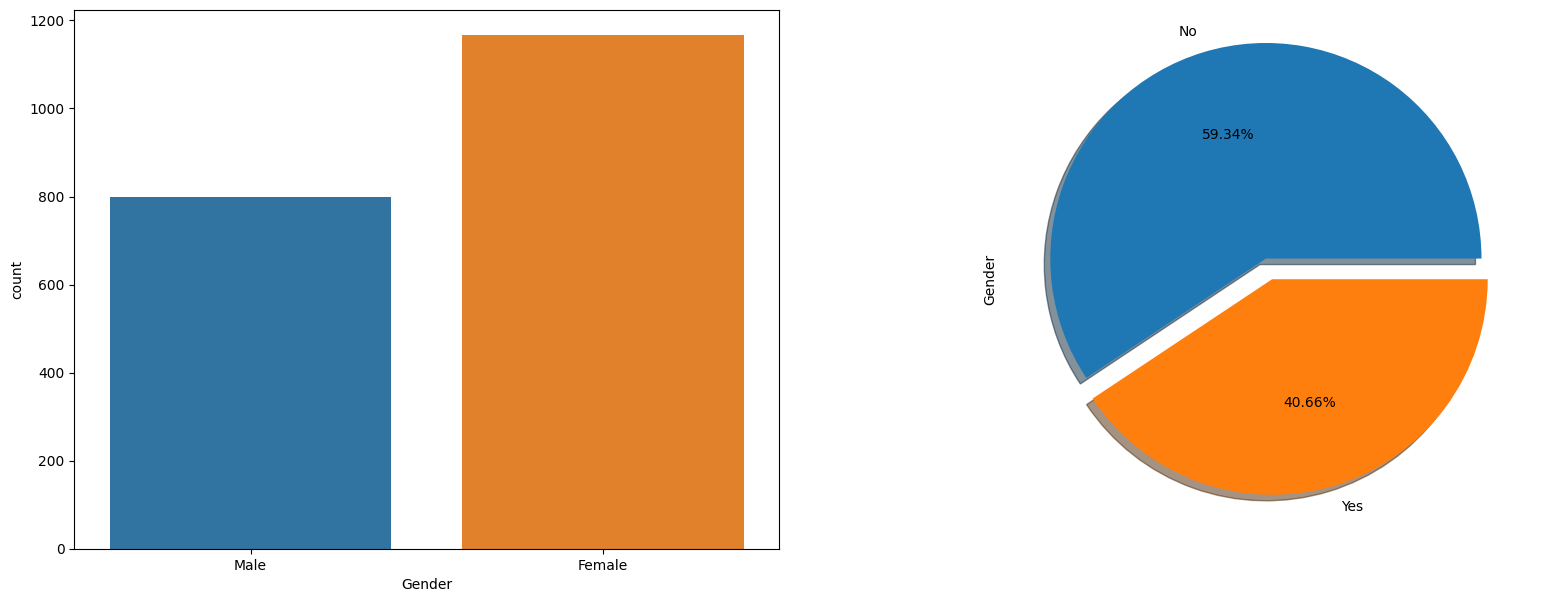

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,7))

sns.countplot(data=data, x='Gender', ax=ax[0])
data['Gender'].value_counts().plot.pie(explode=[0.1,0], autopct='%0.2f%%', labels=['No','Yes'], shadow=True, ax=ax[1])
data['Gender'].value_counts()

### Age

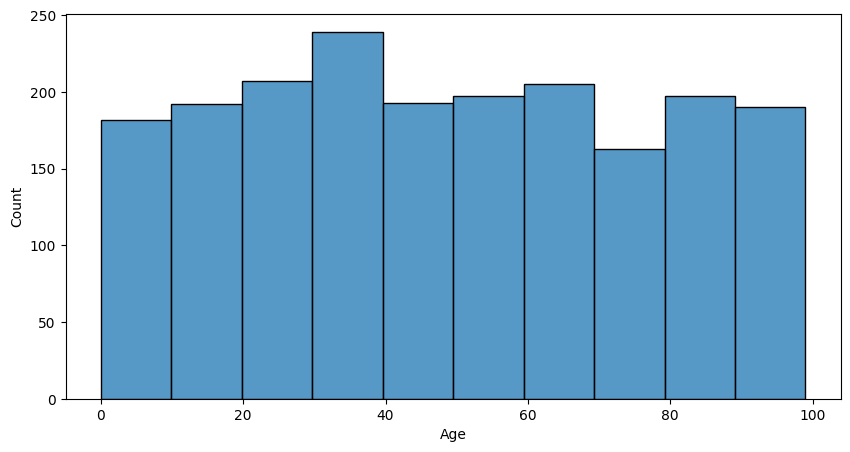

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Age',bins=10)
plt.show()

### Annual Income ($)

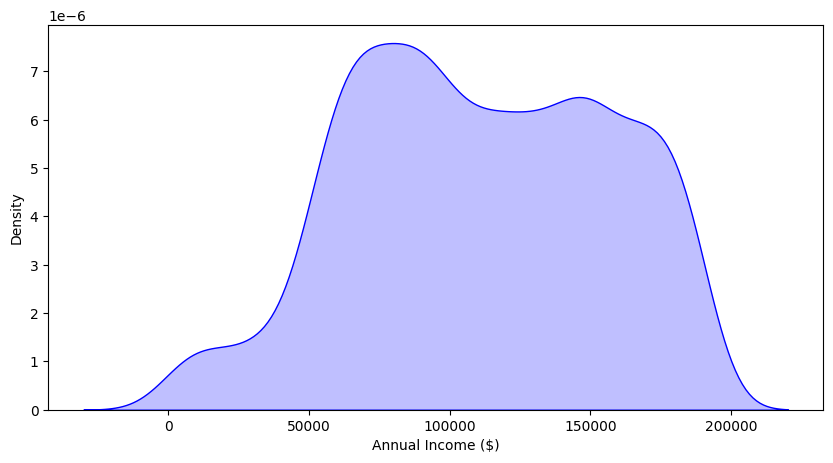

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data,x='Annual Income ($)', color='blue', fill=True)
plt.show()

### Spending Score (1-100)

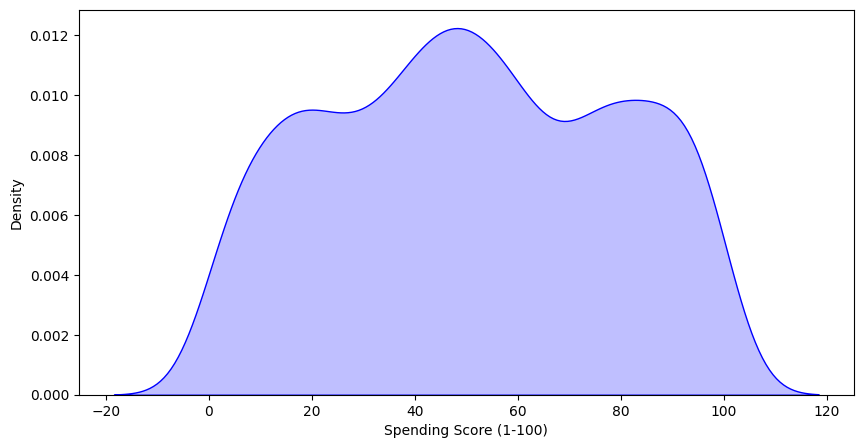

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data,x='Spending Score (1-100)', color='blue', fill=True)
plt.show()

### Profession

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

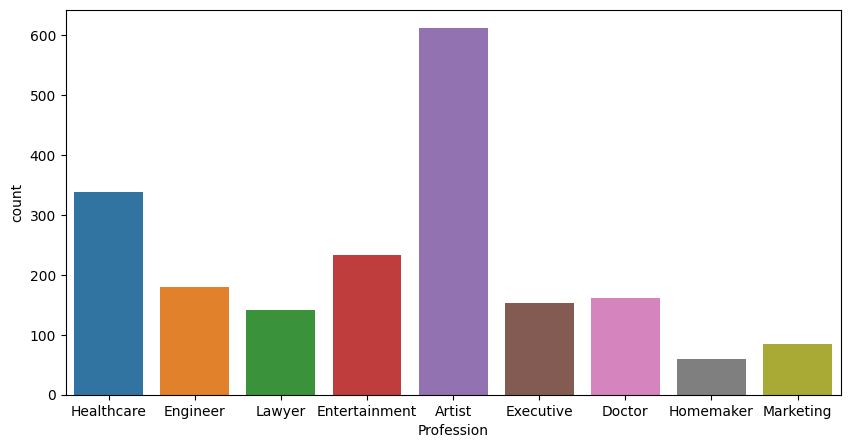

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Profession')
data['Profession'].value_counts()

### Work Experience

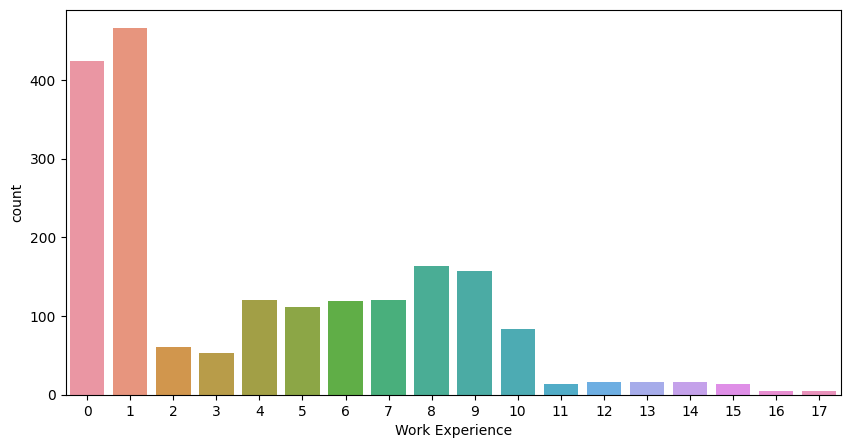

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Work Experience')
plt.show()

### Family Size

2    359
3    308
1    294
4    281
5    252
6    240
7    226
8      4
9      1
Name: Family Size, dtype: int64

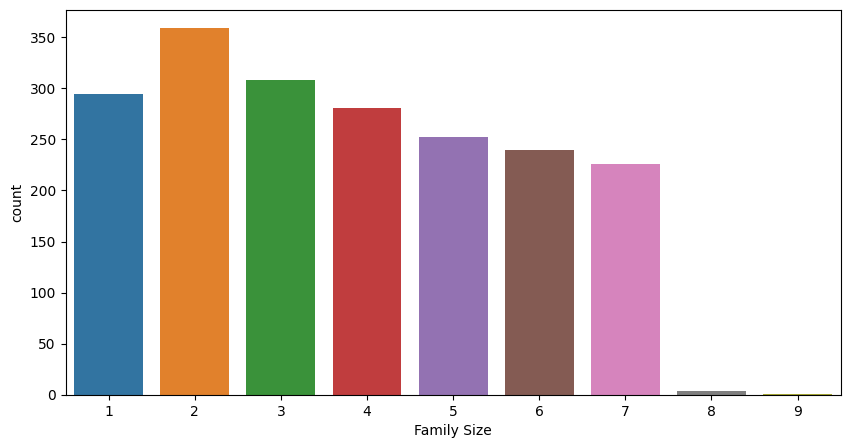

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Family Size')
data['Family Size'].value_counts()

In [21]:
data.head(1)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4


### Bi-variate analysis
### Categorical columns
* Gender
* Profession
* family Size

### Numerical Columns
* Age
* Annual Income ($)
* Spending Score (1-100)
* Work Experience

<Axes: xlabel='Age', ylabel='Gender'>

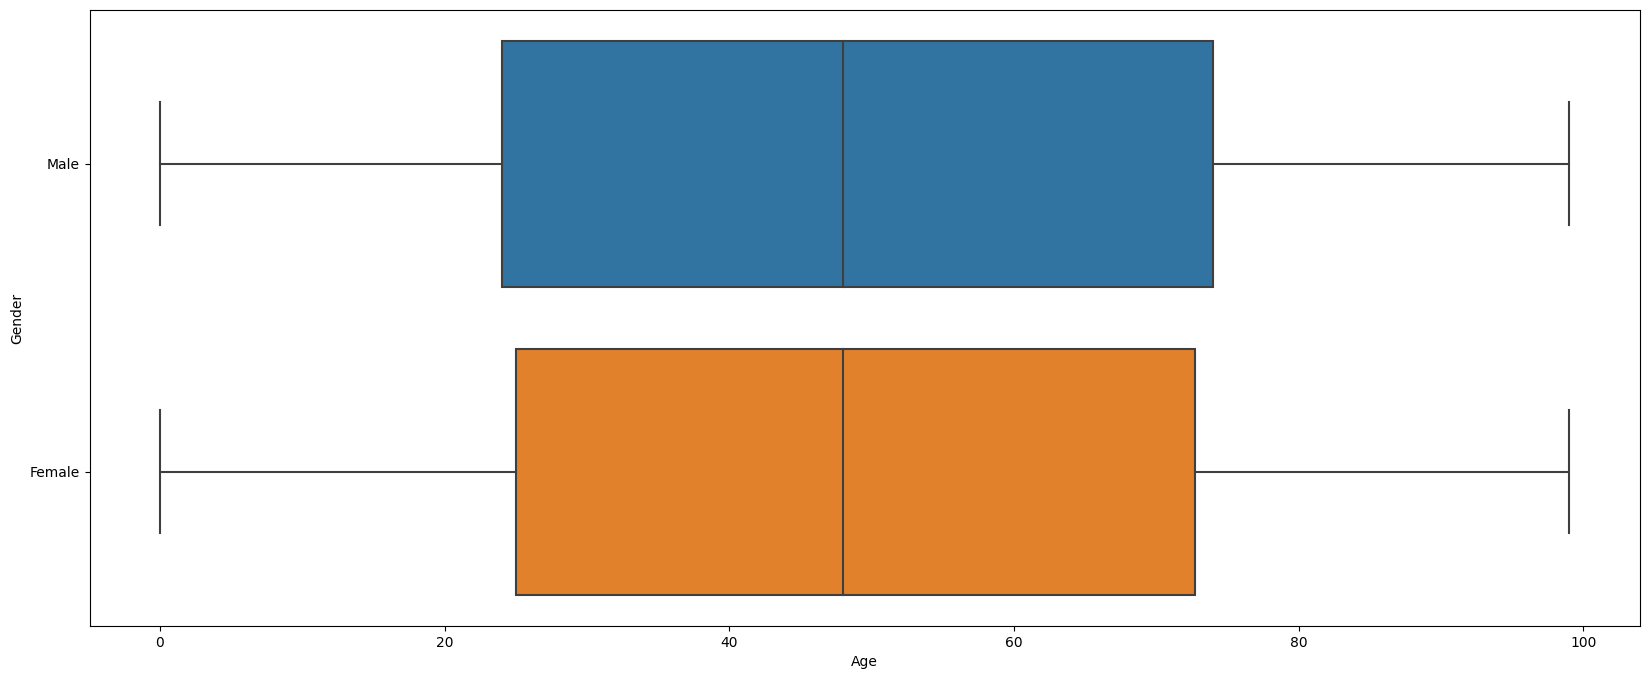

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x="Age", y="Gender", data=data)

<Axes: xlabel='Annual Income ($)', ylabel='Count'>

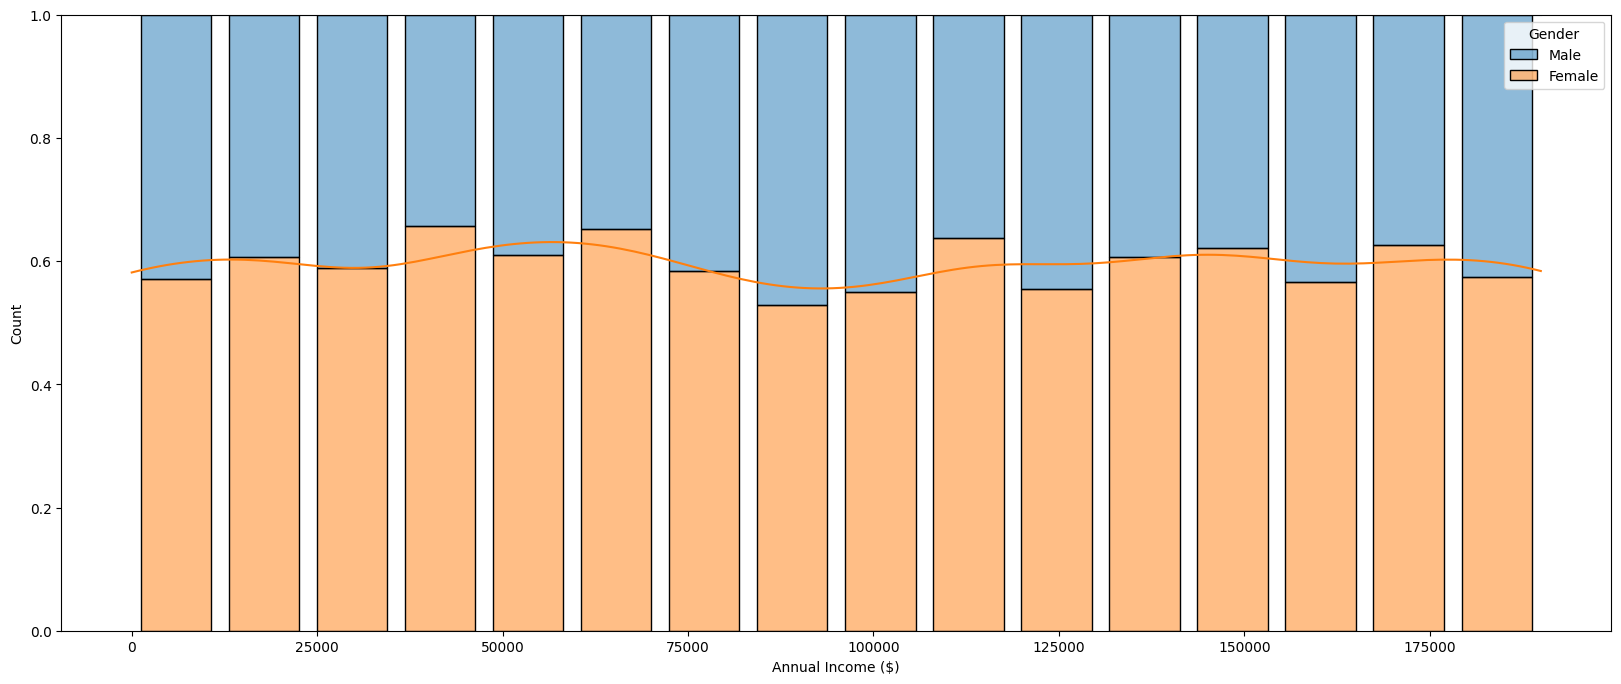

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=data, x='Annual Income ($)', hue='Gender', shrink=0.8, multiple='fill',kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

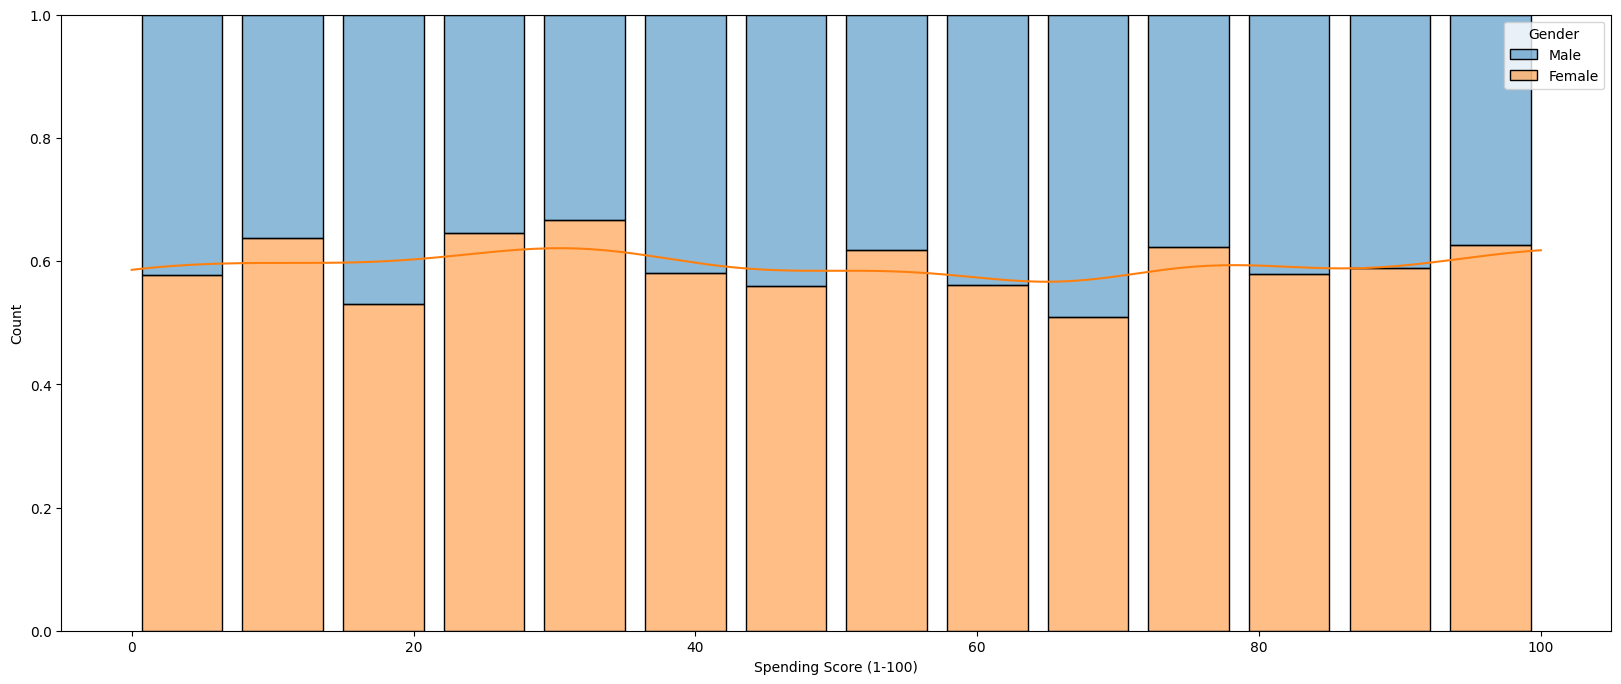

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=data, x='Spending Score (1-100)', hue='Gender', shrink=0.8, multiple='fill',kde=True)

<Axes: xlabel='Profession', ylabel='Count'>

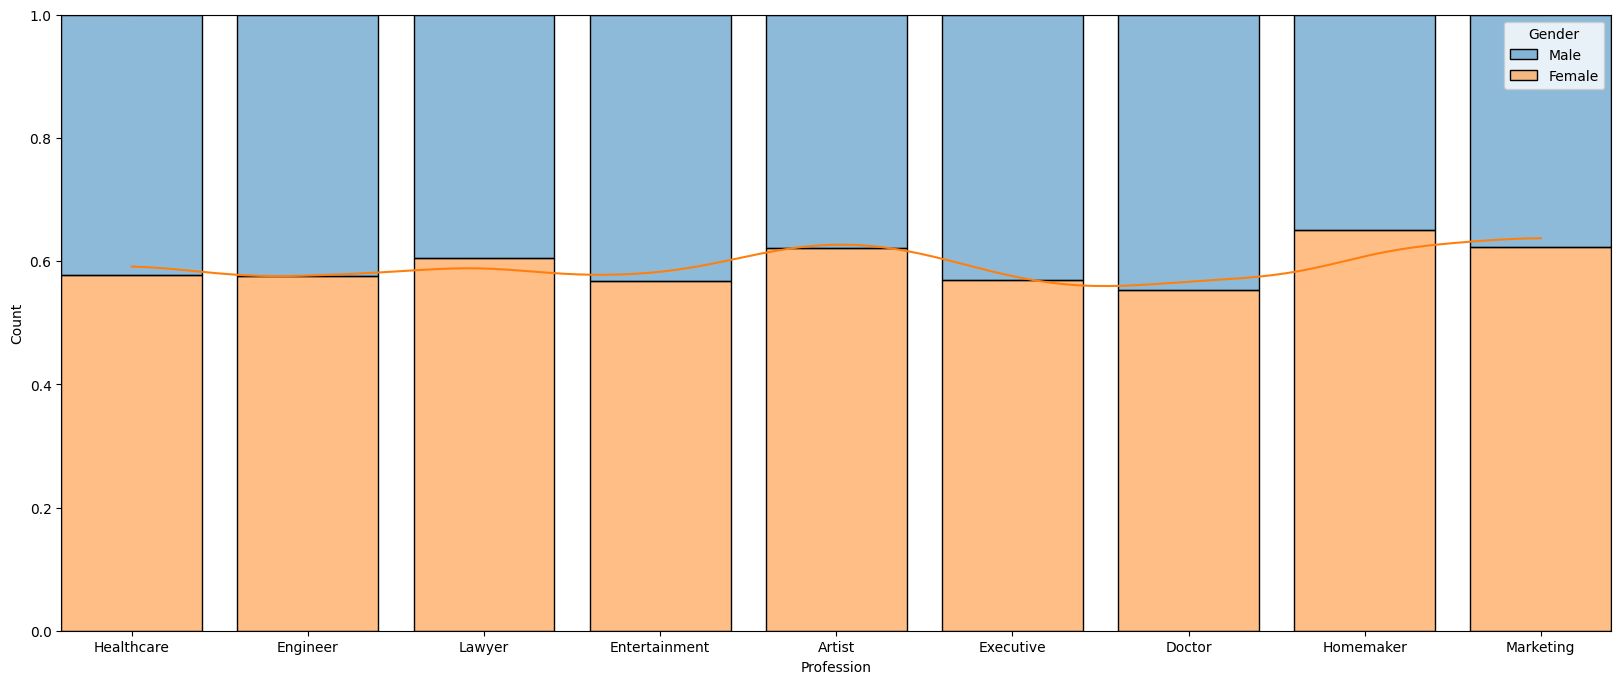

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=data, x='Profession', hue='Gender', shrink=0.8, multiple='fill',kde=True)

<Axes: xlabel='Work Experience', ylabel='Count'>

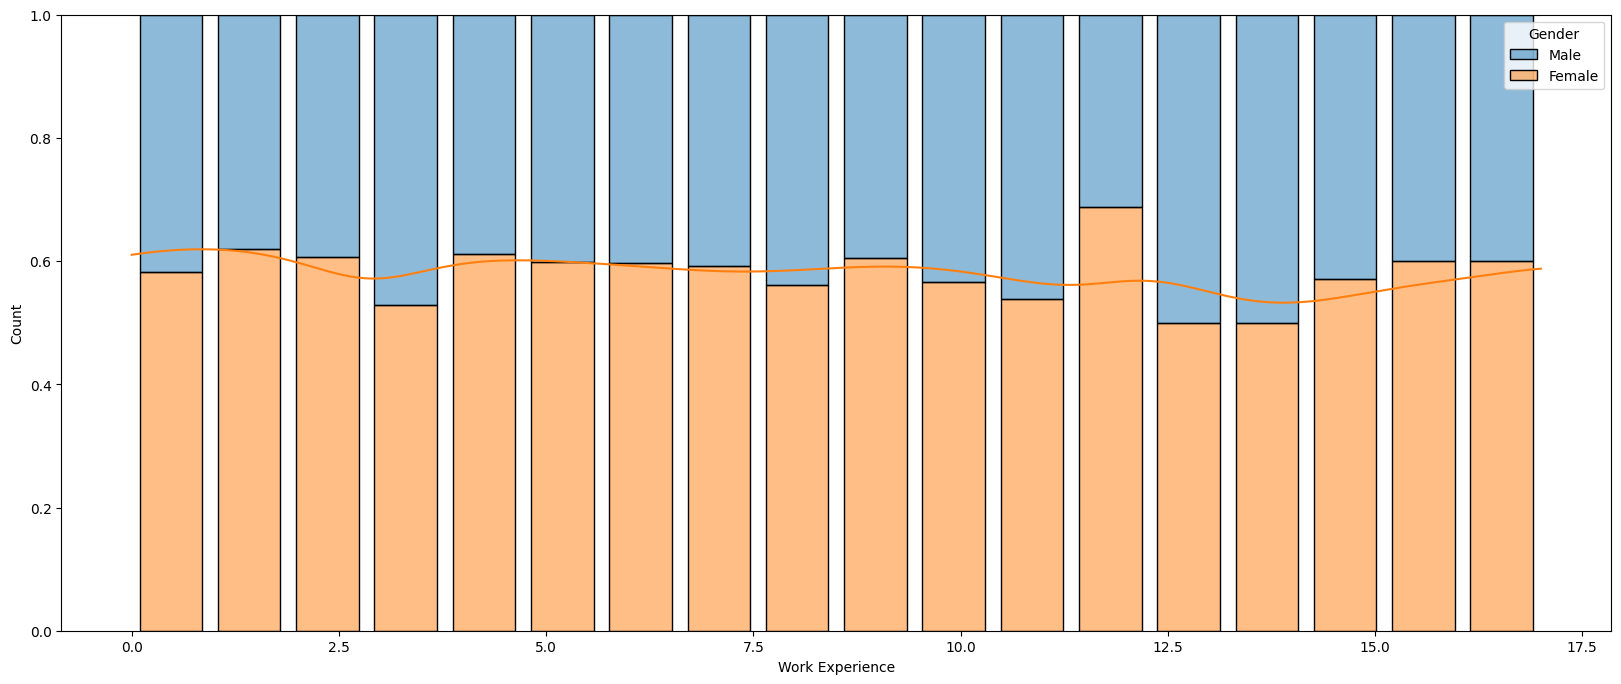

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=data, x='Work Experience', hue='Gender', shrink=0.8, multiple='fill',kde=True)

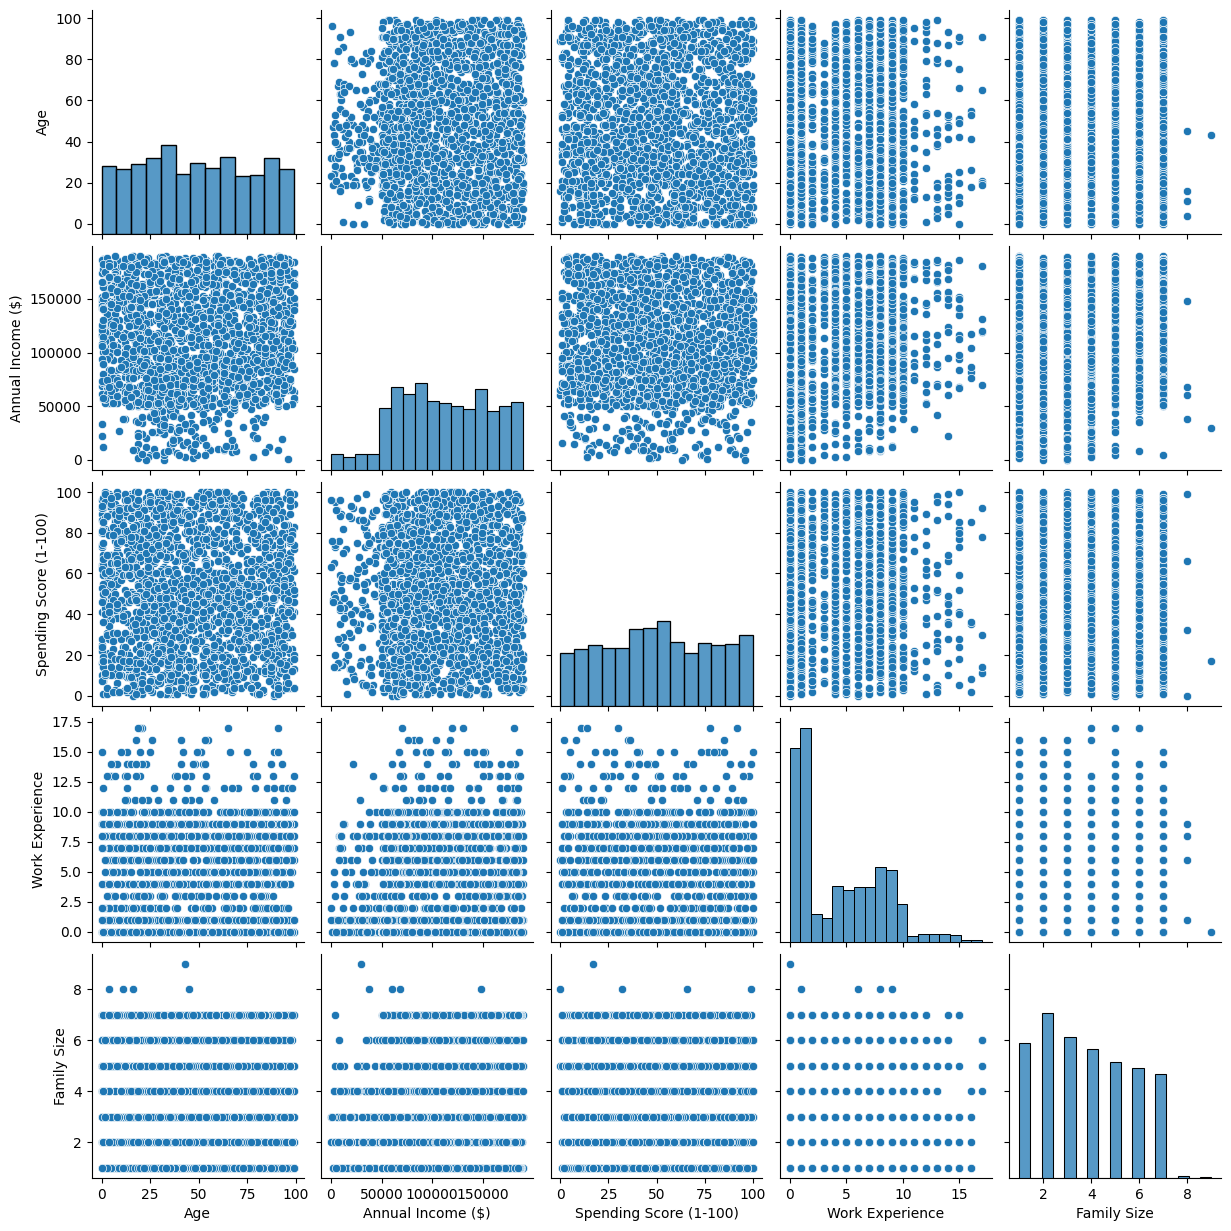

In [27]:
sns.pairplot(data)

In [28]:
data.head(1)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4


In [29]:
X = data.iloc[:,[2,3]].values

In [30]:
X.shape

(1965, 2)

In [31]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

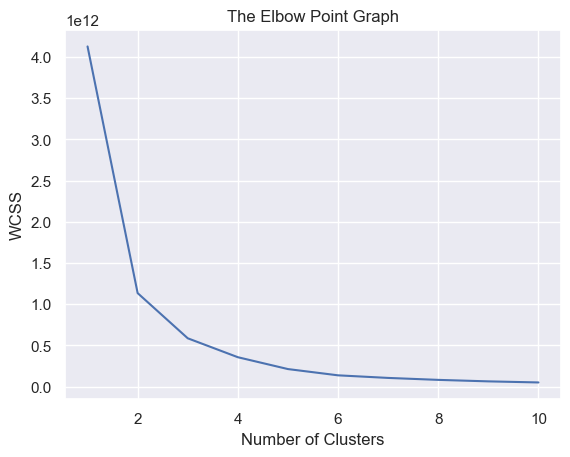

In [32]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=2)

In [34]:
Y = kmeans.fit_predict(X)

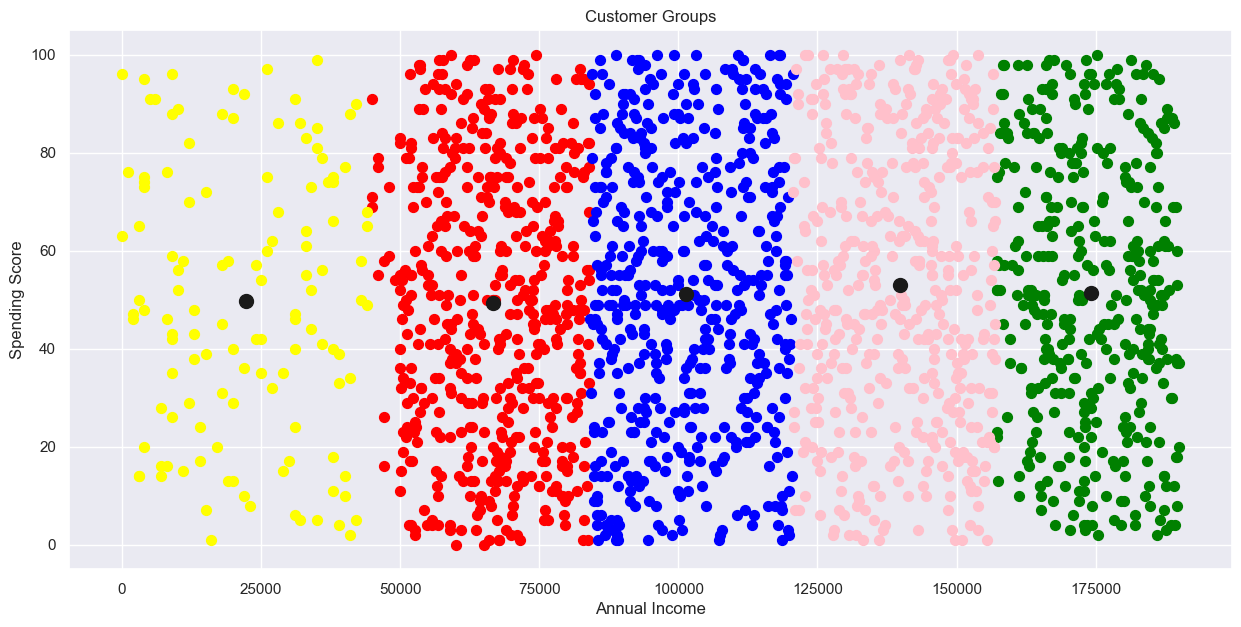

In [35]:
plt.figure(figsize=(15,7))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='pink', label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='k',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

data.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,1,19,15000,39,5,1,4
2,1,21,35000,81,2,3,3


In [37]:
X = data.iloc[:,[1,3]].values

In [38]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       ...,
       [87, 14],
       [77,  4],
       [90, 52]], dtype=int64)

In [39]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

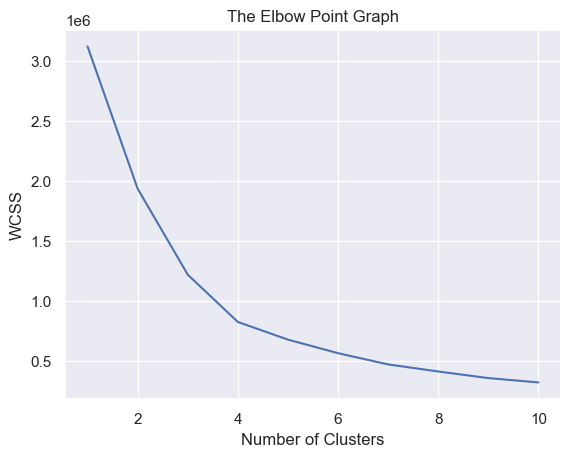

In [40]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=2)

In [42]:
Y = kmeans.fit_predict(X)

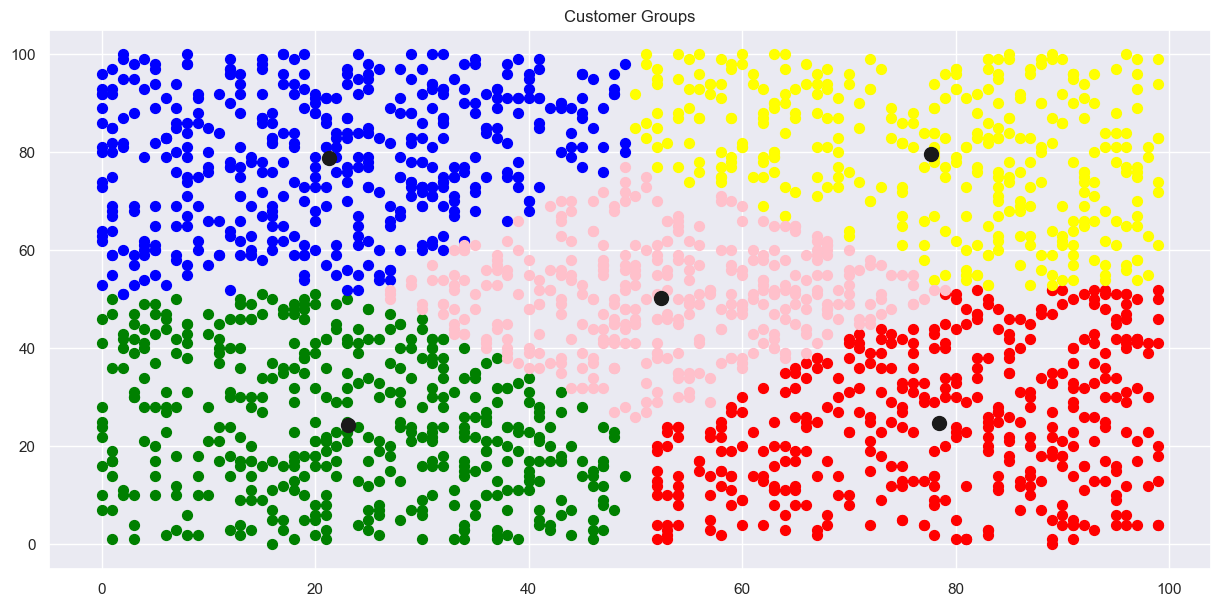

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='pink', label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='k',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('')
plt.ylabel('')
plt.show()